In [2]:
# Import needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Normalizer

In [3]:
# Load the population/profits dataset
column_names = ["Population","Profit"]  
data = pd.read_csv('data/ex1data1.txt', names = column_names)

In [4]:
# Split the dataset into input X and output Y
data_X = data.loc[:, "Population"].values
data_Y = data.loc[:, "Profit"].values

In [5]:
# Reshape the data to match the requirement of regr.fit(x, y)
data_X = data_X.reshape(-1, 1)
data_Y = data_Y.reshape(-1, 1)

In [28]:
# Append the input with the units for X_0
nrows = data_X.shape[0]
onestack = np.ones((nrows, 1))
data_X_full = np.hstack((data_X, onestack))

In [29]:
# Create linear regression model
regr = linear_model.LinearRegression()

In [30]:
# Train the model using the dataset
regr.fit(data_X_full, data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Make predictions using the dataset
data_Y_pred = regr.predict(data_X_full)

In [32]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[1.19303364 0.        ]]


In [33]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(data_Y, data_Y_pred))

Mean squared error: 8.95


In [34]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(data_Y, data_Y_pred))

Variance score: 0.70


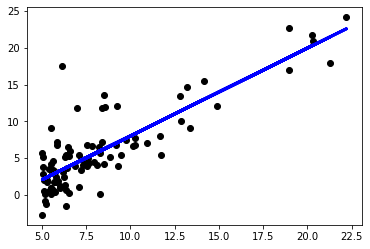

In [35]:
# Plot outputs
plt.scatter(data_X, data_Y,  color='black')
plt.plot(data_X, data_Y_pred, color='blue', linewidth=3)

<strong> Normalizing the Data First <strong>

In [52]:
# Applying data normalization
data_X_norm = np.zeros((data_X.shape[0], 1))
i = 0
max = data_X.max()
for row in data_X:
    data_X_norm[i] = row[0]/max
    i = i + 1
data_X_norm = np.hstack((data_X_norm, onestack))

In [53]:
# Create normalized linear regression model
regr2 = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [60]:
# Train the model using the dataset
regr2.fit(data_X_norm, data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# Make predictions using the dataset
data_Y_pred2 = regr2.predict(data_X_norm)

In [62]:
# The coefficients
print('Coefficients: \n', regr2.coef_)

Coefficients: 
 [[26.488926  0.      ]]


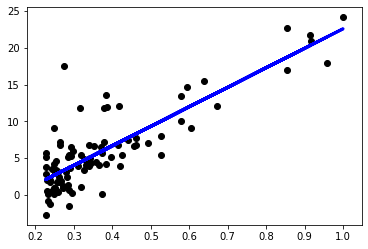

In [63]:
# Plot outputs
plt.scatter(data_X_norm[:, 0], data_Y,  color='black')
plt.plot(data_X_norm[:, 0], data_Y_pred2, color='blue', linewidth=3)